In [1]:
import pandas as pd
import matplotlib.pyplot as plt

series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, index_col=0, squeeze=True)
print(series.head())


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


/var/folders/b8/j_gf4x196c1ch2_p5wh4jzj40000gn/T/ipykernel_68122/3839571826.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, index_col=0, squeeze=True)


In [2]:
'''
6 types of plots:
1. Line - single and group
2. Histograms and density - hist and line
3. Box and whisker - single and group
4. Heat maps - group and single
5. Lag or scatter - group and single
6. Autocorrelation
'''

'\n6 types of plots:\n1. Line\n2. Histograms and density\n3. Box and whisker\n4. Heat maps\n5. Lag or scatter\n6. Autocorrelation\n'

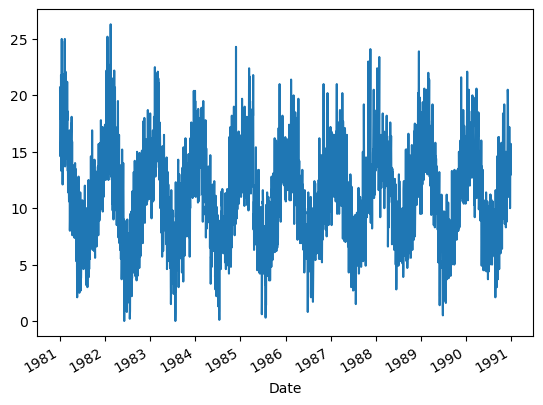

In [ ]:
#time series line plot
series.plot()
pyplot.show()

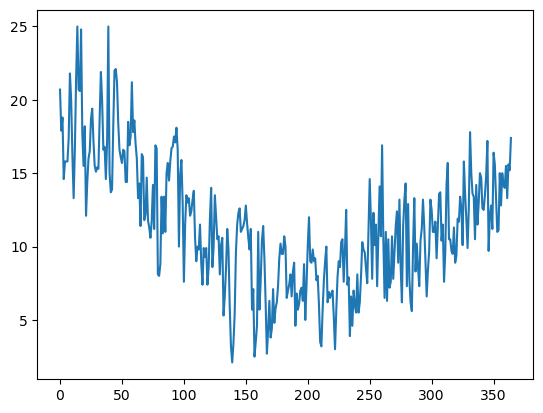

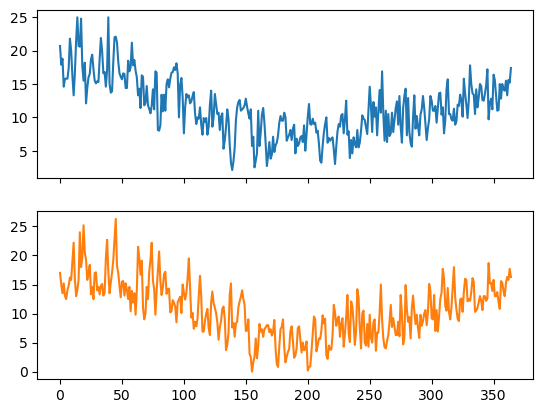

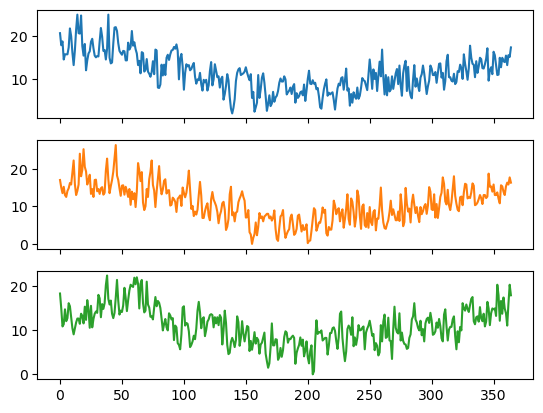

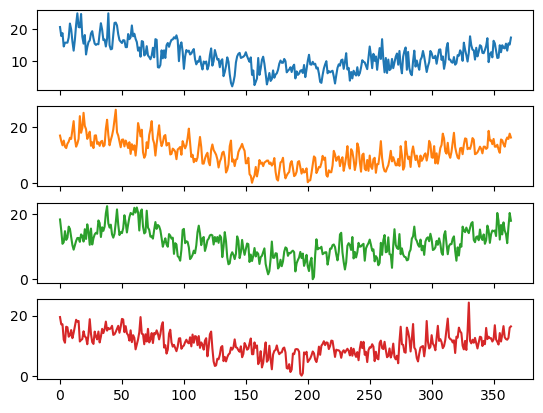

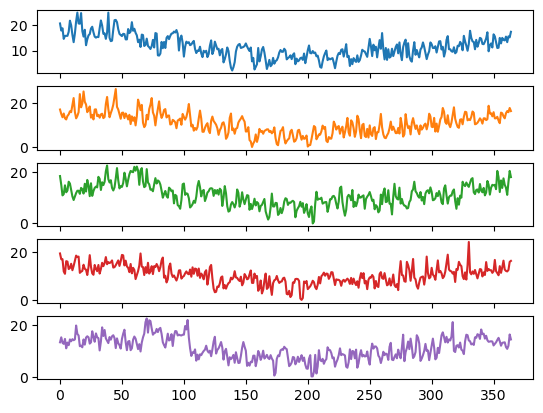

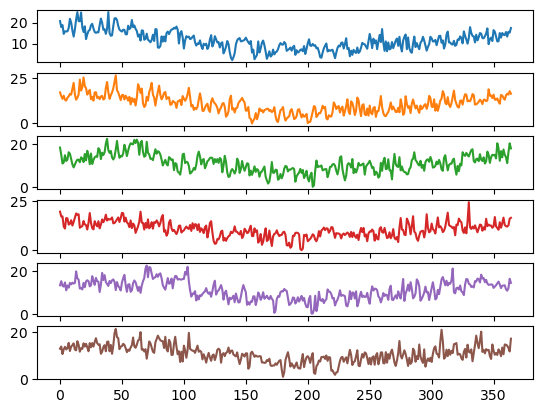

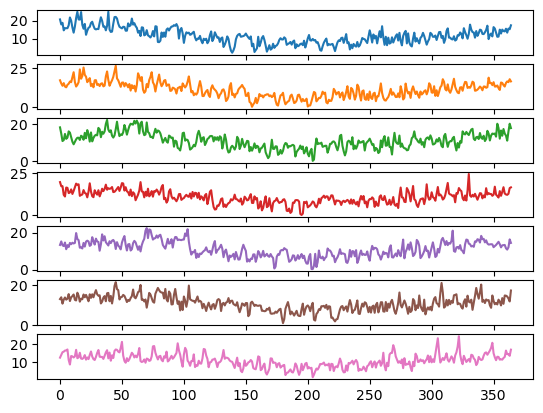

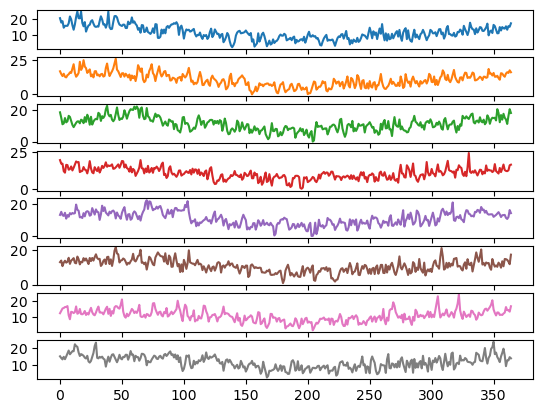

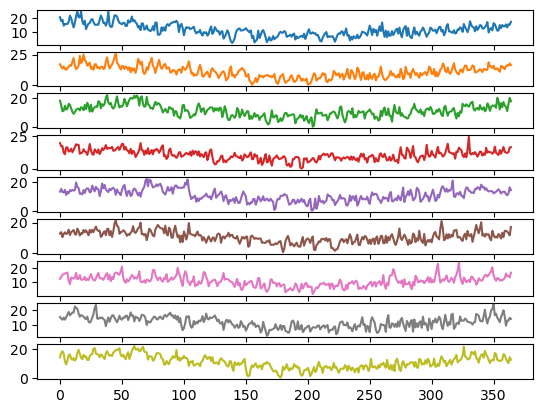

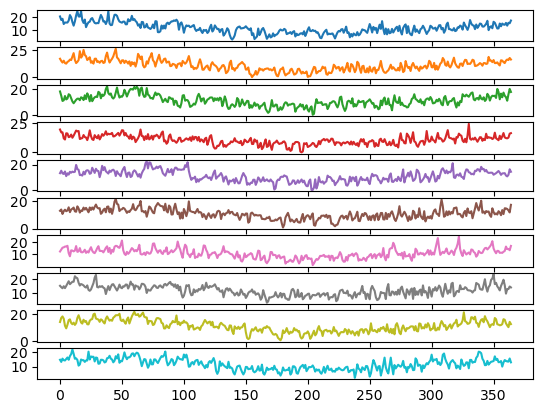

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values
    years.plot(subplots=True, legend=False)
    plt.show()
    print()


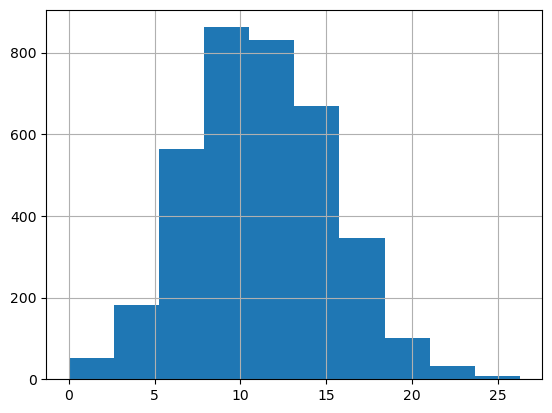

In [5]:
#time series histogram and density plots
series.hist()
plt.show()

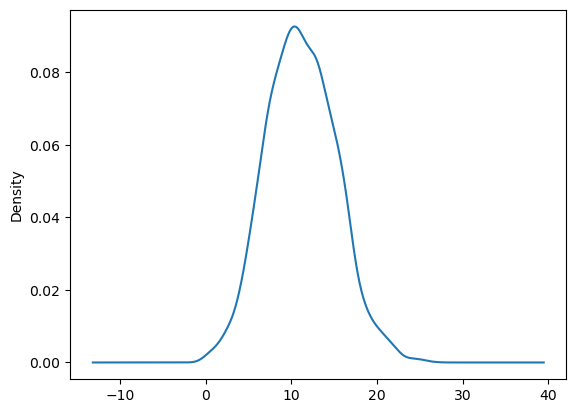

In [6]:
series.plot(kind='kde')
plt.show()

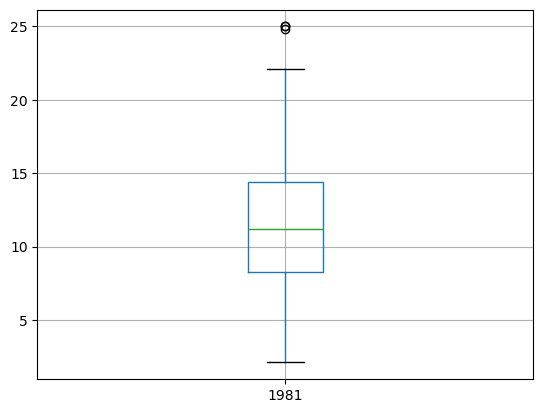

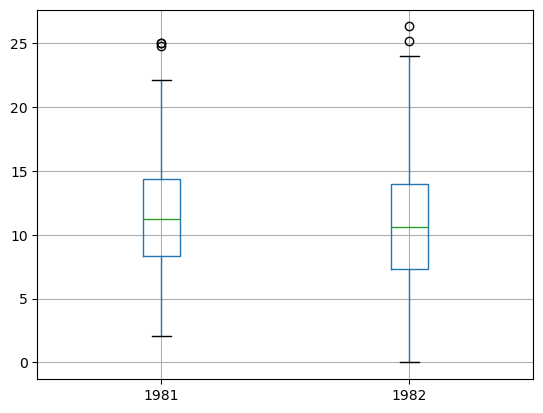

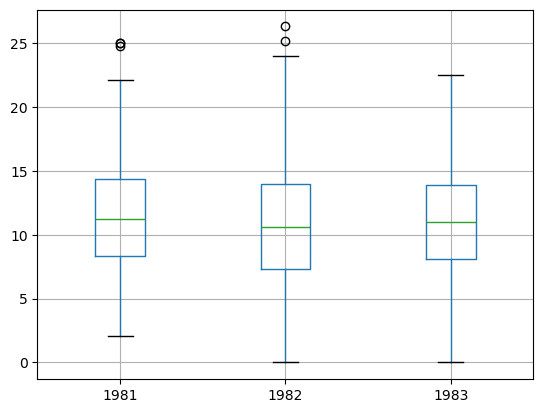

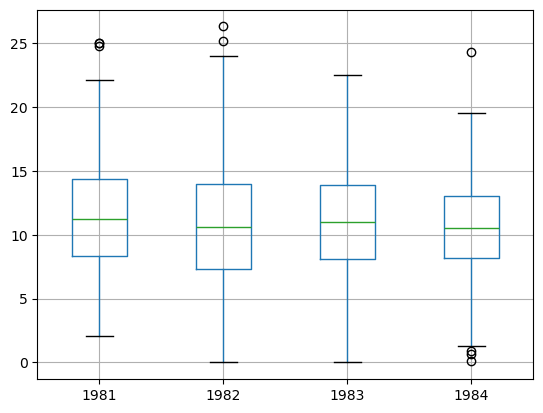

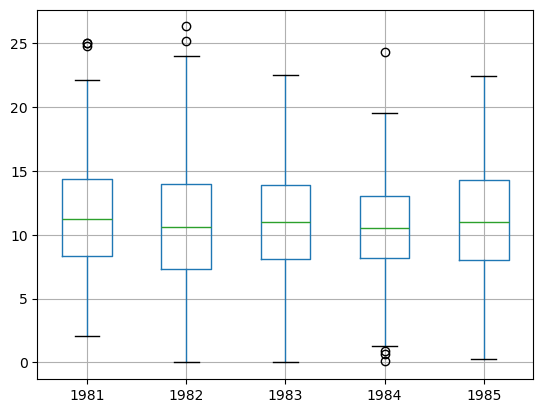

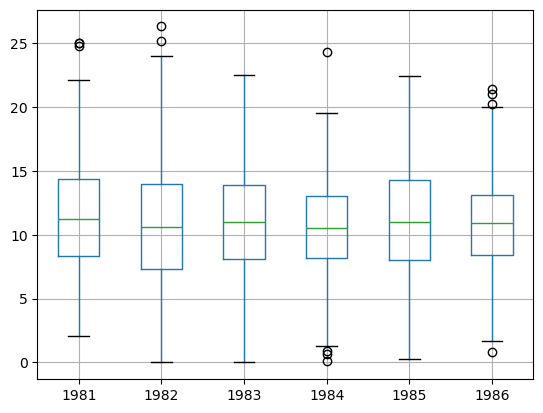

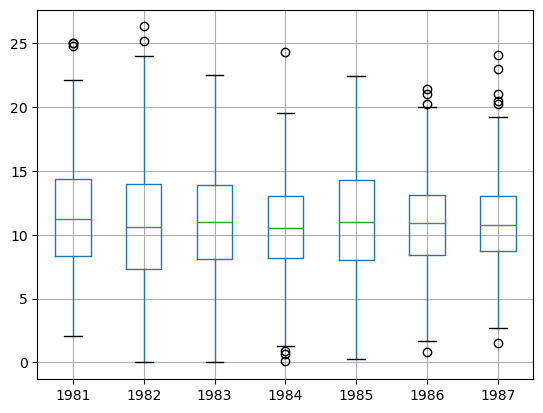

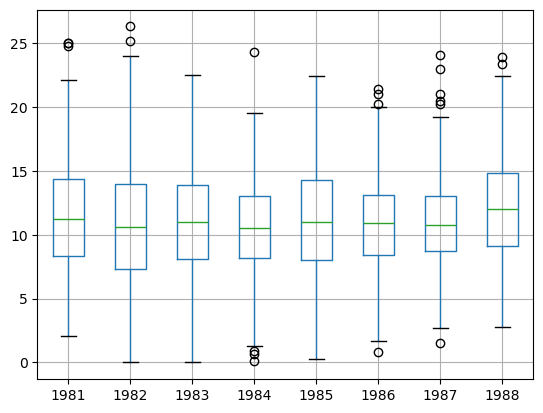

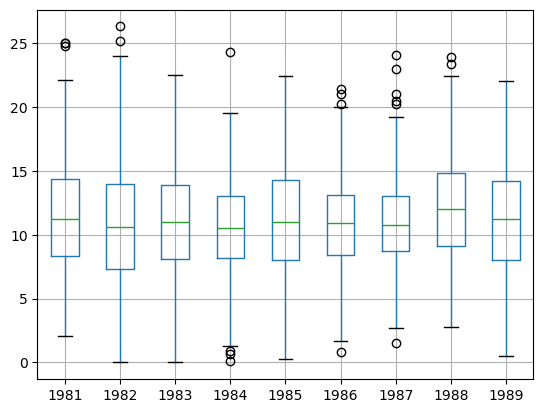

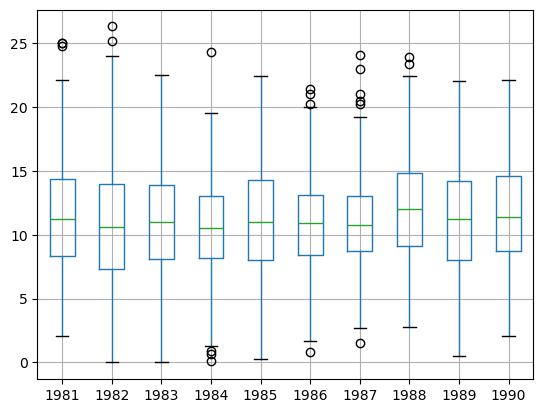

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

groups = series.groupby(pd.Grouper(freq="A"))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values
    years.boxplot()
    plt.show()
    print()


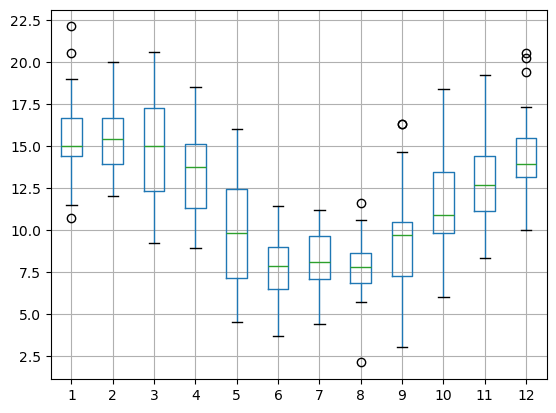

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months.columns = range(1, 13)
months.boxplot()
plt.show()


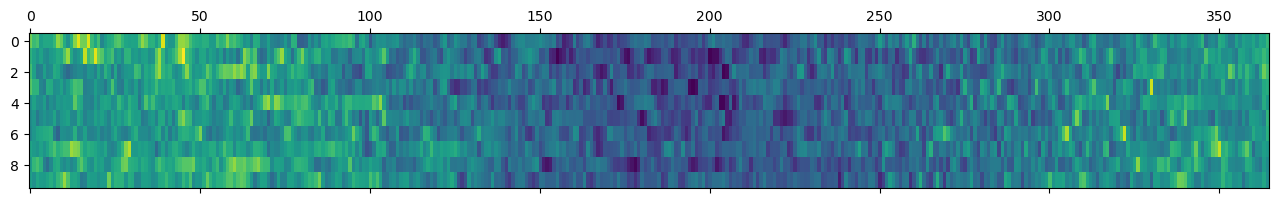

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years = years.T
plt.matshow(years, interpolation=None, aspect="auto")
plt.show()


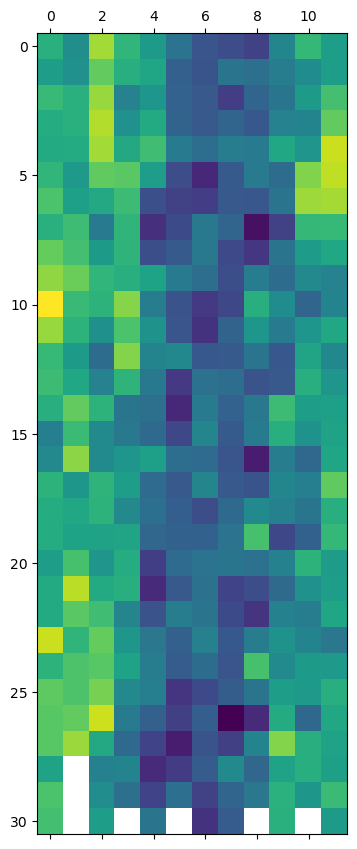

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq="M"))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months.columns = range(1, 13)

plt.matshow(months, interpolation=None, aspect='auto')
plt.show()


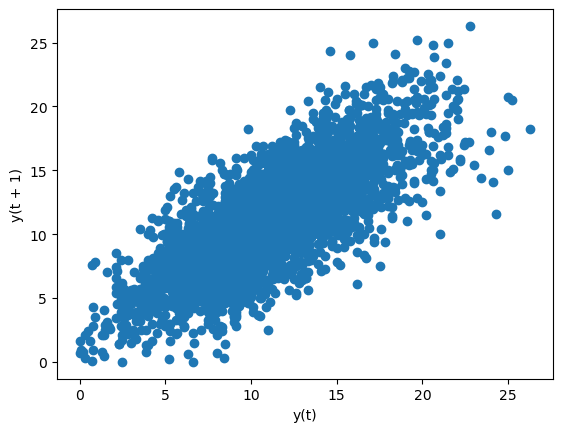

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import lag_plot

lag_plot(series)
plt.show()

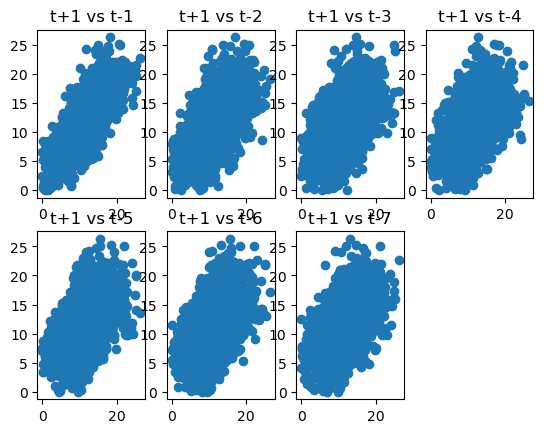

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

values = pd.DataFrame(series.values)
lags = 7
columns = [values]

for i in range(1, lags + 1):
    columns.append(values.shift(i))

dataframe = pd.concat(columns, axis=1)

columns = ['t+1']
for i in range(1, lags + 1):
    columns.append('t-' + str(i))

dataframe.columns = columns

plt.figure(1)
for i in range(1, lags + 1):
    ax = plt.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-' + str(i)].values)

plt.show()


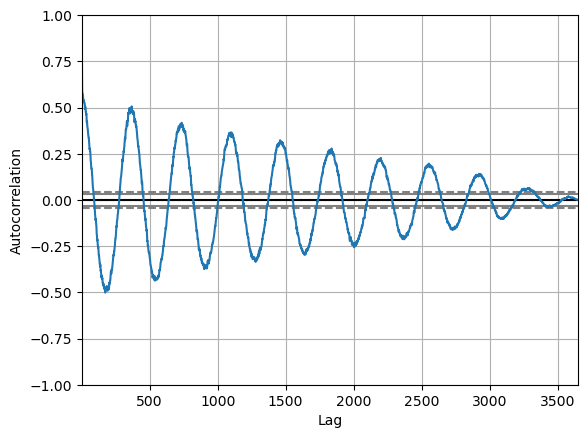

In [15]:
#time series autocorrelation plots
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()

In [ ]:
plt.boxplot(series.values)
plt.show()